## Brainstorming ideas for milestone 1
### Dataset: Beer reviews

Typical import stuff

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_FOLDER = 'data/'

Load the datasets

In [138]:
m_beers_raw = pd.read_csv(DATA_FOLDER + 'merged/beers.csv', sep=',', header=[0, 1])
m_breweries = pd.read_csv(DATA_FOLDER + 'merged/breweries.csv', sep=',', header=[0, 1])
m_ratings = pd.read_csv(DATA_FOLDER + 'merged/ratings.csv', sep=',', header=[0, 1])
m_users = pd.read_csv(DATA_FOLDER + 'merged/users_approx.csv', sep=',', header=[0, 1])


Quick transformation for multi-indexing

In [139]:
m_beers = m_beers_raw.copy()
m_beers.loc[:, ('rb', 'source')] = 'rb'
m_beers.loc[:, ('ba', 'source')] = 'ba'
m_beers = pd.concat([m_beers['rb'], m_beers['ba']], axis=0).set_index(['source', 'beer_id'], drop=True)
# Same thing for ratings
m_ratings.loc[:, ('rb', 'source')] = 'rb'
m_ratings.loc[:, ('ba', 'source')] = 'ba'
m_ratings = pd.concat([m_ratings['rb'], m_ratings['ba']], axis=0).set_index(['source', 'beer_id', 'user_id'], drop=True)
m_ratings['date'] = pd.to_datetime(m_ratings['date'], unit='s')
m_ratings.head(5)


abv  appearance  aroma  \
source beer_id user_id                            
rb     2360    83106    11.3         4.0   10.0   
       17109   91324     5.0         2.0    3.0   
       35298   98624     5.0         4.0    8.0   
       113596  98624     5.0         4.0    8.0   
       173481  98624     6.0         4.0    8.0   

                                                      beer_name  brewery_id  \
source beer_id user_id                                                        
rb     2360    83106                    Rochefort Trappistes 10         406   
       17109   91324                         Myanmar Lager Beer        2921   
       35298   98624     Cantillon Tyrnilambic Baie dArgousier        1069   
       113596  98624          Cantillon Pikkulinnun Viskilambic        1069   
       173481  98624    3 Fonteinen Oude Geuze (Armand & Tommy)        2058   

                                          brewery_name                date  \
source beer_id user_id                                                       
rb     2360    83106               Brasserie Rochefort 2013-12-22 11:00:00   
       17109   91324    Myanmar Brewery and Distillery 2011-11-29 11:00:00   
       35298   98624                         Cantillon 2012-11-22 11:00:00   
       113596  98624                         Cantillon 2014-11-17 11:00:00   
       173481  98624             Brouwerij 3 Fonteinen 2012-08-18 10:00:00   

                        overall  palate  rating                     style  \
source beer_id user_id                                                      
rb     2360    83106       19.0     4.0     4.6             Abt/Quadrupel   
       17109   91324        6.0     2.0     1.7                Pale Lager   
       35298   98624       17.0     4.0     4.1      Lambic Style - Fruit   
       113596  98624       16.0     4.0     4.1  Lambic Style - Unblended   
       173481  98624       16.0     4.0     4.0     Lambic Style - Gueuze   

                        taste  \
source beer_id user_id          
rb     2360    83106      9.0   
       17109   91324      4.0   
       35298   98624      8.0   
       113596  98624      9.0   
       173481  98624      8.0   

                                                                     text  \
source beer_id user_id                                                      
rb     2360    83106     a)  Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...   
       17109   91324    Can. Weak and watery, not the best beer of the...   
       35298   98624    Bottle @ One Pint Pub, Helsinki. Originally ra...   
       113596  98624    Draught @Â Pikkulintu, Helsinki, Finland. A pr...   
       173481  98624    750ml bottleBottling date: 2011/02/17 - Pours ...   

                          user_name review  
source beer_id user_id                      
rb     2360    83106       Erzengel    NaN  
       17109   91324    visionthing    NaN  
       35298   98624          tiong    NaN  
       113596  98624          tiong    NaN  
       173481  98624          tiong    NaN

Load the review w/ text file (special format)

In [77]:
import importlib
import sys
sys.path.append('src/')
import src.data_utils as data_utils

importlib.reload(data_utils)

BA_FILEPATH = 'data/merged/ratings_with_text_ba.txt'
RB_FILEPATH = 'data/merged/ratings_with_text_rb.txt'

ba_ratings = data_utils.load_dict_like_text_file(BA_FILEPATH,BLK_SIZE=1_000, MAX_BLK=100_000)
rb_ratings = data_utils.load_dict_like_text_file(RB_FILEPATH,BLK_SIZE=1_000, MAX_BLK=100_000)

LOADED 'ratings_with_text_ba.txt'                         
LOADED 'ratings_with_text_rb.txt'                         


In [79]:
display(ba_ratings.head(2))
display(rb_ratings.head(2))

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text,review
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,4.5,3.25,3.75,3.75,3.91,This was a 12 oz bottle poured into a snifter....,True
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1357729200,AgentMunky,agentmunky.409755,4.0,3.75,3.5,3.5,3.75,3.64,Poured from a 12 ounce bottle into a pilsner g...,True


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
0,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1429178400,ciaranc,151109,3,7,2,8,17,3.70,"Bottle, gift from Aaron. Black, big head, lots..."
1,Ards Bally Black Stout,155699,Ards Brewing Co.,13538,Stout,4.6,1427796000,Rowlymo,198957,4,7,4,8,15,3.80,500ml Bottle in Bittles bar Belfast. Chocolate...


Create a dataframe to show the different columns of the merged datasets

In [114]:
col_info = pd.DataFrame({'ba_ratings_text': pd.Series(ba_ratings.columns),
            'rb_ratings_text': pd.Series(rb_ratings.columns),
            'beers': pd.Series(m_beers.columns.unique()),
            'breweries': pd.Series(m_breweries['ba'].columns.unique()),
            'users': pd.Series(m_users['ba'].columns.unique()),
            'ratings': pd.Series(m_ratings.columns.unique())})
col_info

,ba_ratings_text,rb_ratings_text,beers,breweries,users,ratings
0,beer_name,beer_name,abv,id,joined,abv
1,beer_id,beer_id,avg,location,location,appearance
2,brewery_name,brewery_name,avg_computed,name,nbr_ratings,aroma
3,brewery_id,brewery_id,avg_matched_valid_ratings,nbr_beers,nbr_reviews,beer_name
4,style,style,beer_name,NaN,user_id,brewery_id
5,abv,abv,beer_wout_brewery_name,NaN,user_name,brewery_name
6,date,date,brewery_id,NaN,user_name_lower,date
7,user_name,user_name,brewery_name,NaN,NaN,overall
8,user_id,user_id,nbr_matched_valid_ratings,NaN,NaN,palate
9,appearance,appearance,nbr_ratings,NaN,NaN,rating


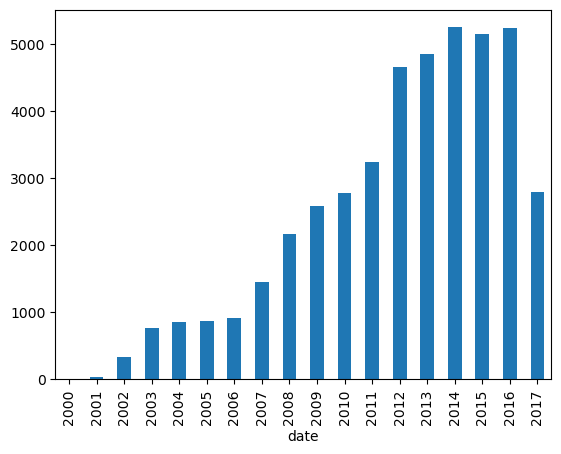

43928


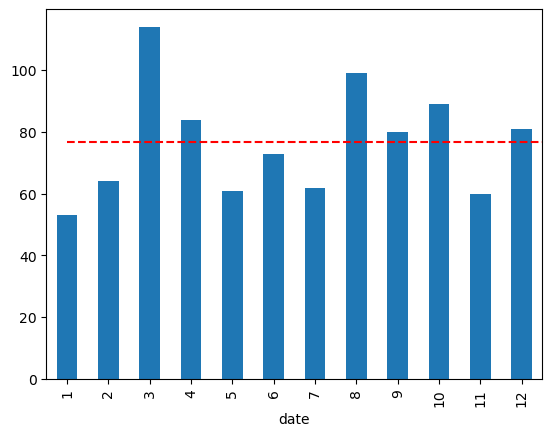

<Axes: >

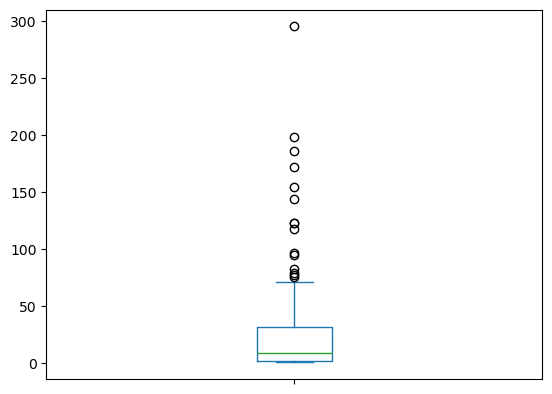

In [225]:
year = 2006
m_ratings.groupby(m_ratings['date'].dt.year).size().plot(kind='bar')
plt.show()
print(m_ratings.groupby(m_ratings['date'].dt.year).size().sum())
m_ratings[m_ratings.date.dt.year == year].groupby(m_ratings['date'].dt.month).size().plot(kind='bar')
plt.plot([0,12],[m_ratings[m_ratings.date.dt.year == year].groupby(m_ratings['date'].dt.month).size().apply('mean')]*2, color='red', linestyle='--')
plt.show()
m_users['ba'].groupby(m_users['ba']['location']).size().plot.box(y='x')